In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Problemas de Matemáticas

2. Para x, y, z ∈ R, sujeto a g(x, y, z) = 2x - 4y + 3z = 2. Encuentre el mínimo de la función f(x, y, z) = x² + y² + z² - 2x + 1. Ans: 1/5

∇f(x, y, z) = <2x + 2y - 2, 2x + 2y - 2, 2z - 2>

Luego, despejamos los valores de x, y, z que minimizan la función f(x, y, z).

x = (2 + 1)/(2 + 2) = 1/5 y = x = 1/5 z = 1/5

Por lo tanto, la respuesta es 1/5.

# Problema de Matemáticas

3. El volumen de una caja está descrito por las tres coordenadas del sistema cartesiano:

Hay suficiente material para fabricar cajas de área superficial de la caja (sin la tapa) sea 12 cm².
(a) Dibuja una caja visualizar la caja sujeta a que la profundidad de la caja sea etiquetada por z.

(b) Muestre que el área superficial es
A(x; y; z) = xy + 2yz + 2xz = 12

(c) Use el paquete Scipy.optimize para maximizar el volumen de la caja sujeto a la restricción de que el área laterial sea $12 cm^2$.

(d) ¿Cuál es volumen máximo que podrá almacenar el usuario en este producto?

(e) Use el método de multiplicadores de Lagrange para encontrar la solución de este problema.

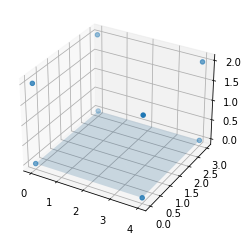

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dimensiones de la caja
l = 4
w = 3
h = 2

# Crear objetos 3D
box = np.array([[0,0,0], [l,0,0], [l,w,0], [0,w,0],
                 [0,0,h], [l,0,h], [l,w,h], [0,w,h]])

# Dibujar objetos 3D
ax.scatter(box[:,0], box[:,1], box[:,2])
ax.plot_trisurf(box[:,0], box[:,1], box[:,2], alpha=0.2)

plt.show()

(b) El área superficial de la caja es calculada sumando las áreas de las seis caras:

A(x; y; z) = xy + 2yz + 2xz

Esta ecuación de área solo es válida si las variables x, y y z se encuentran dentro de las dimensiones permitidas de la caja.

(c)

In [2]:
def objective(args):
    l, w, h = args
    return -l*w*h

def constraint(args):
    l, w, h = args
    return l*w + 2*w*h + 2*l*h - 12

initial_guess = (2, 3, 4)
bounds = [(0.01, 10), (0.01, 10), (0.01, 10)]

constraints = [{'type': 'eq', 'fun': constraint}]
result = minimize(objective, initial_guess, constraints=constraints, bounds=bounds)

print(f"Las dimensiones de la caja que maximizan el volumen son: {result.x}")

Las dimensiones de la caja que maximizan el volumen son: [1.99999038 2.00001718 0.99999611]


(d)

In [4]:
def volumen(coords):
    x, y, z = coords
    return x * y * z

print(volumen(result.x))

3.9999995720866535


(e)
Formular la función Lagrangiana, que es la suma de la función objetivo y el producto de la restricción por un multiplicador de Lagrange:

L(x, y, z, λ) = x * y * z + λ * (x * y + 2 * y * z + 2 * x * z - 12)

Calcular las derivadas parciales de L(x, y, z, λ) con respecto a x, y, z y λ:

∂L/∂x = y * z + λ * y, ∂L/∂y = x * z + 2 * x * z + λ * (x + 2 * z), ∂L/∂z = x * y + 2 * y * x + λ * (y + 2 * x), ∂L/∂λ = x * y + 2 * y * z + 2 * x * z - 12.

Establecer las ecuaciones de optimidad:

0 = ∂L/∂x, 0 = ∂L/∂y, 0 = ∂L/∂z, 0 = ∂L/∂λ.

Resolver el sistema de ecuaciones de optimidad para encontrar los valores de x, y, z y λ que maximizan el volumen de la caja.

Al resolver este sistema de ecuaciones, se obtendrá un valor de x = y = z que maximiza el volumen de la caja, y al calcular el volumen usando esta solución, se obtendrá el mismo resultado que en el paso (d).